# Plots of Ferrite Measurements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import S2P_Tools as s2p

Apparatus Measurements and Fundamental Constants

In [ ]:
# Speed of light
c = 299792458

# Sample thickness
d = 0.0127

#### Primitive Approach to Measure $\mu$
This primitive approach involves only the $s_{21}$ phase. The phase from when there is no sample present is subtracted from the measured phase when a sample is present, then the expected phase for an air gap of thickness $d$ is added to compensate. Using this corrected $s_{21}$ phase the product $\epsilon\mu$ can be measured. Assuming $\epsilon\sim 14$ gives us $\mu$. 

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_0A.s2p
Average εµ: 71.51644841382483


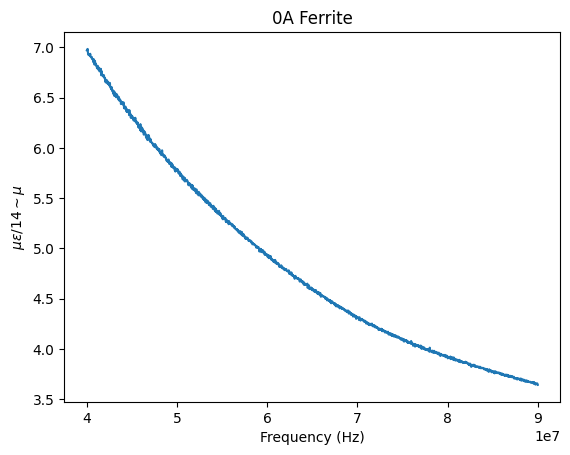

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_5A.s2p
Average εµ: 93.4530183129669


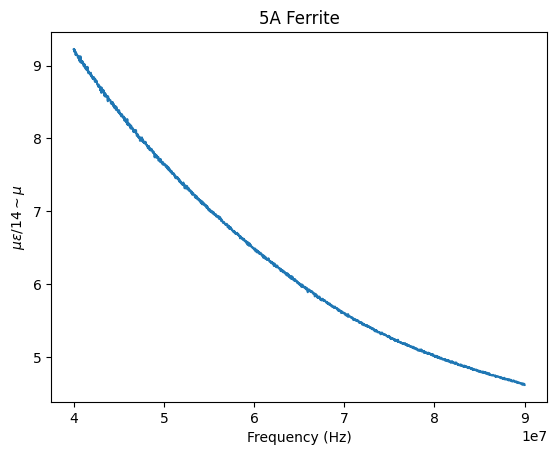

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_10A.s2p
Average εµ: 62.7607300623429


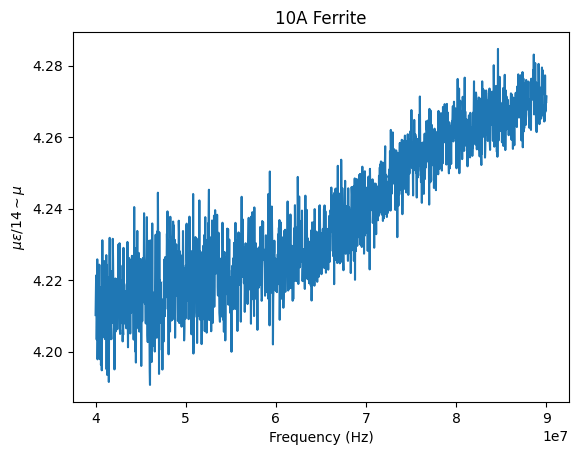

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_15A.s2p
Average εµ: 24.228767623904744


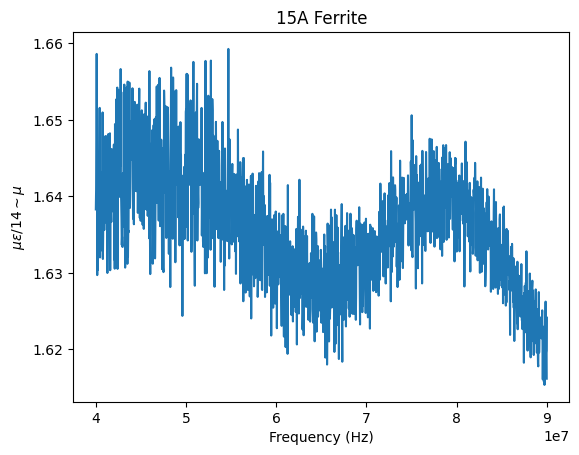

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_20A.s2p
Average εµ: 20.238339366440478


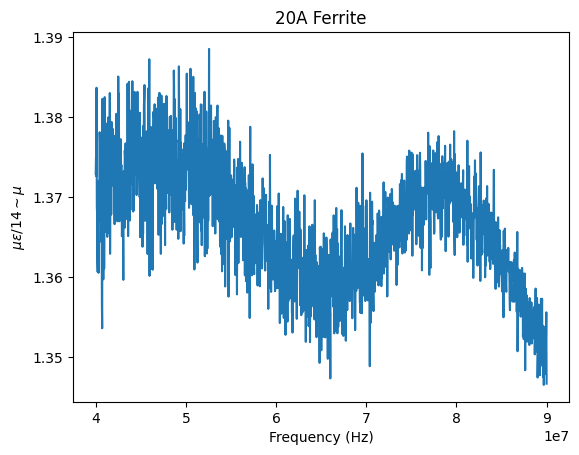

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A.s2p
Average εµ: 18.750462819002106


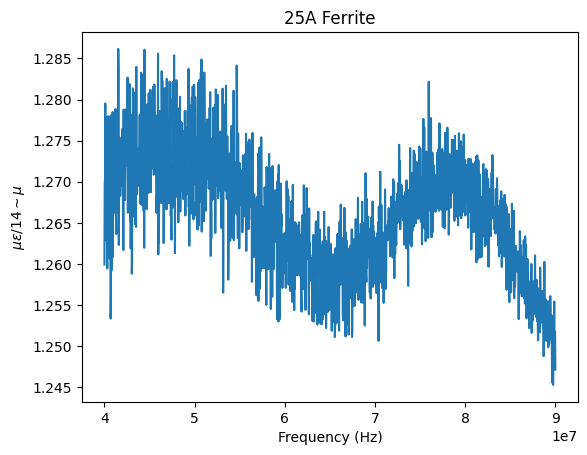

In [ ]:
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07032023_Ferrite_Meas_Current\NO_SAMPLE_0A.s2p')

# Wavelength in free space
lambda_0 = c / frequency


# Phase correction
phi_0 = 360 * d/lambda_0
corr_phase = s21_phase - phi_0

for i in range(0,6):
    print('07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_'+str(i*5) +'A.s2p')
    frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_'+str(i*5) +'A.s2p')
    s21_phase = s21_phase - corr_phase

    # Plot S21 magnitude and phase
    lambda_g = 360 / s21_phase * d
    muepsilon = (c / (frequency * lambda_g))**2
    print("Average εµ:" , np.average(muepsilon))
    plt.plot(frequency, muepsilon/14.81)
    plt.title(str(i*5) + 'A Ferrite')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('$\mu\epsilon/14 \sim \mu$')
    plt.show()

#### De-Embedded Data to Find $\mu$ with Air Sample Phase Manually Added
TRVNA is used to deembed the 25A ferrite sample measurements using the 0A sample measurements. The phase correction required for the airgap of thickness $d$ is then added back in. $\mu\epsilon$ is calculated from the $s_{21}$ phase and the energy loses are quantified using the magnitude of the s-parameters, via $1-[s_{12}^2+s_{22}^2]$.

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_DEEMBED.s2p


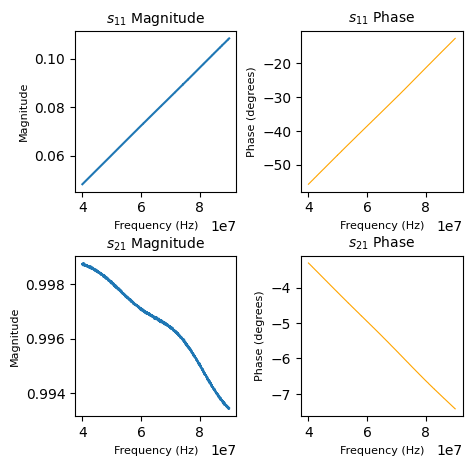

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_DEEMBED.s2p with Phase Correction


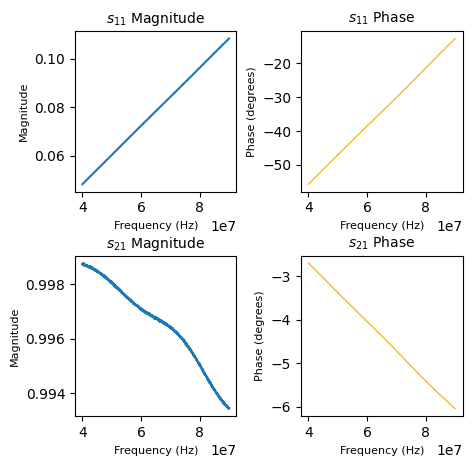

Average εµ: 19.559924926897096


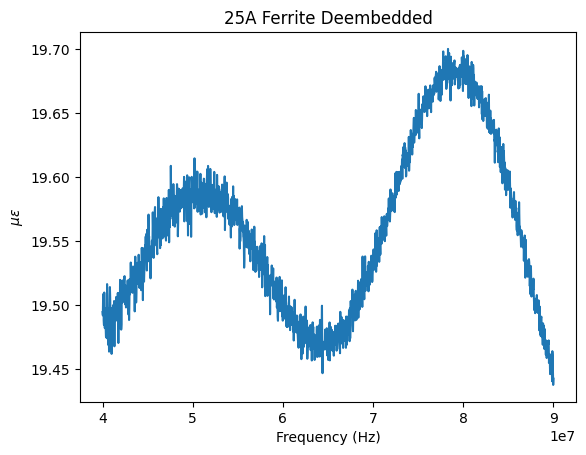

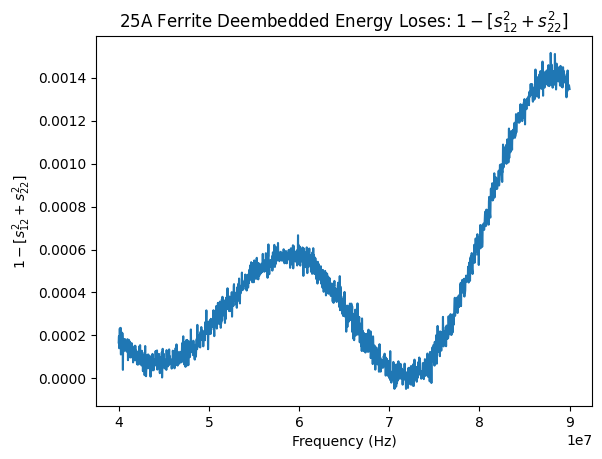

In [4]:
filename = r'07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_DEEMBED.s2p'
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(filename, True)

# Phase correction
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s21_phase = s21_phase + phi_0

# Plot the data with the air sample phase correction added
s2p.plot_parameters(filename + " with Phase Correction", frequency, s11_mag, s11_phase, s21_mag, s21_phase)

# Plot epsilon*mu
lambda_g = 360 / s21_phase * d
muepsilon = (c / (frequency * lambda_g))**2
print('Average εµ:' , np.average(muepsilon))
plt.plot(frequency, muepsilon)
plt.title("25A Ferrite Deembedded")
plt.xlabel('Frequency (Hz)')
plt.ylabel('$\mu\epsilon$')
plt.show()

# Energy loses
plt.plot(frequency, 1-(s11_mag**2 + s21_mag**2))
plt.title("25A Ferrite Deembedded Energy Loses: $1-[s_{12}^2+s_{22}^2]$")
plt.xlabel('Frequency (Hz)')
plt.ylabel('$1-[s_{12}^2+s_{22}^2]$')
plt.show()

#### Nicolson-Ross-Weir Method using De-Embedding with Air Sample Phase Manually Added
This approach follows the analysis in 'Modern ferrites: Vol. 1, Chapter 7.3.1.1, Pages 167-168'. The following is a check on the deembedding process by deembedding the no sample data with the no sample data, before adding in the phase manually. By construction, this should return $\epsilon=\mu=1$.

07032023_Ferrite_Meas_Current\NO_SAMPLE_0A_AVG.s2p


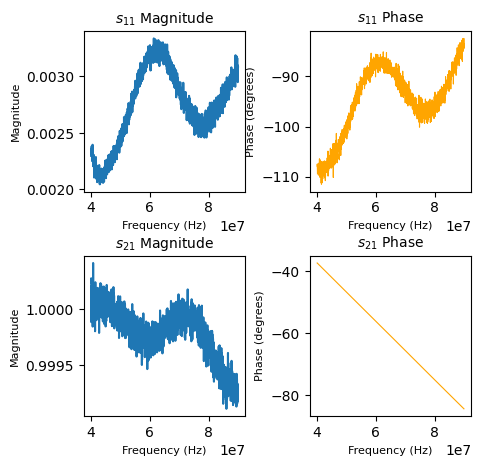

07032023_Ferrite_Meas_Current\NO_SAMPLE_0A_DEEMBED.s2p


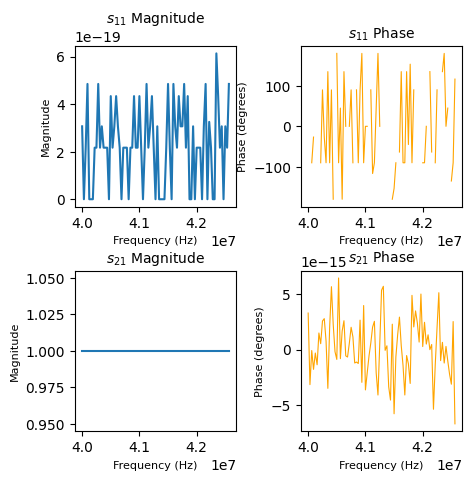

07032023_Ferrite_Meas_Current\NO_SAMPLE_0A_DEEMBED.s2p with Phase Correction


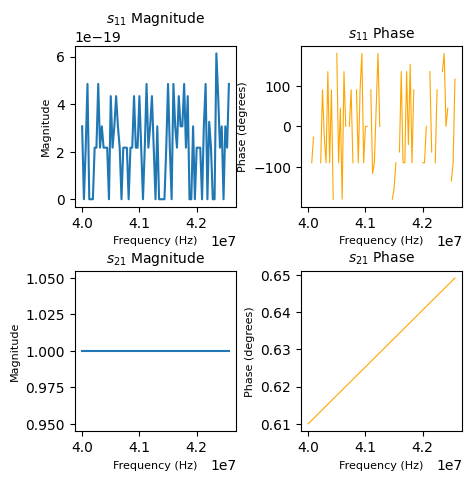

Relative permittivity:  (0.9999999900000005-9.103354601777385e-07j)
Relative permeability:  (1.0000000099999427+9.102991864102944e-07j)


In [5]:
filename = r'07032023_Ferrite_Meas_Current\NO_SAMPLE_0A_AVG.s2p'
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(filename, True)
filename = r'07032023_Ferrite_Meas_Current\NO_SAMPLE_0A_DEEMBED.s2p'
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(filename, True)

# Phase correction
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s21_phase = s21_phase + phi_0

# Plot the data with the air sample phase correction added
s2p.plot_parameters(filename + " with Phase Correction", frequency, s11_mag, s11_phase, s21_mag, s21_phase)

# Calculate epsilon and mu using the NRW method
s11 = 0.00000001 * np.exp(1j * np.deg2rad(0)) # Numbers effectively zero causes infinities unless we set it to this
s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

K = (s11**2-s21**2+1)/(2*s11)

R = np.zeros_like(K)
mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

T = (s11+s21-R)/(1-(s11+s21)*R)
lambda_0 = c / frequency
A = -((1/(2*np.pi*d)) * np.log(1/T))**2

# Non-zero cut off wavelength [e.g. for square waveguides]
#mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2-1/lambda_c**2)
#epsilon_r = (lambda_0**2 / mu_r ) * (1/lambda_c**2+ A)

# Zero cut-off wavelength as in coaxial cable
mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
epsilon_r = (lambda_0**2 / mu_r ) * (A)

print('Relative permittivity: ', np.average(epsilon_r))
print('Relative permeability: ', np.average(mu_r))

Now the deembedded data for the ferrite sample under 25A bias is used in the NRW method above. The complex logarithm is not unique, and since it does not return the $\epsilon$ and $\mu$ expected other values of this logarithm are investigated. 

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_AVG.s2p


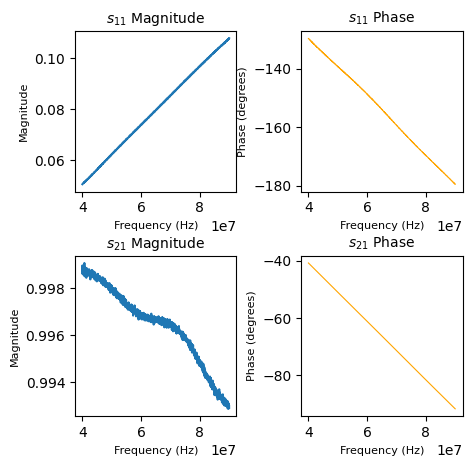

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_DEEMBED.s2p


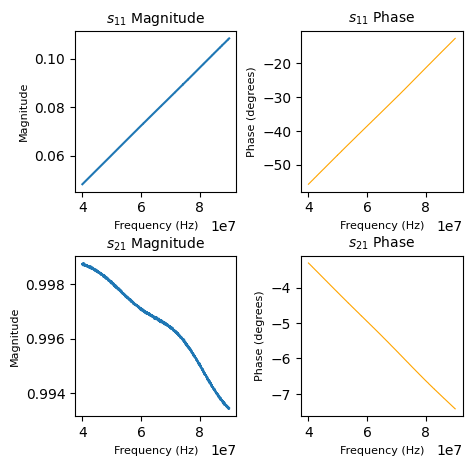

07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_DEEMBED.s2p with Phase Correction


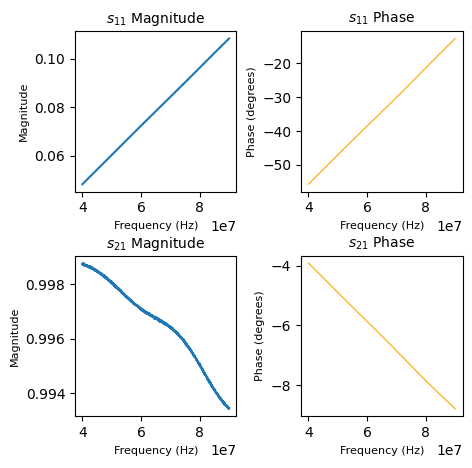

i:  -4
Relative permittivity:  (123.43742124738002+85.2889159784169j)
Relative permeability:  (74.72949225156675-49.82619269029814j)
i:  -3
Relative permittivity:  (90.48743181538538+63.0601353853619j)
Relative permeability:  (54.99136645599967-36.320407204138206j)
i:  -2
Relative permittivity:  (57.53744238339073+40.83135479230692j)
Relative permeability:  (35.253240660432574-22.814621717978262j)
i:  -1
Relative permittivity:  (24.587452951396116+18.60257419925194j)
Relative permeability:  (15.515114864865488-9.30883623181832j)
i:  0
Relative permittivity:  (8.362536480598507+3.6262063938030447j)
Relative permeability:  (4.223010930701598-4.1969492543416225j)
i:  1
Relative permittivity:  (41.31252591259314+25.85498698685803j)
Relative permeability:  (23.961136726268688-17.702734740501565j)
i:  2
Relative permittivity:  (74.26251534458775+48.08376757991302j)
Relative permeability:  (43.69926252183577-31.208520226661506j)
i:  3
Relative permittivity:  (107.21250477658239+70.31254817296

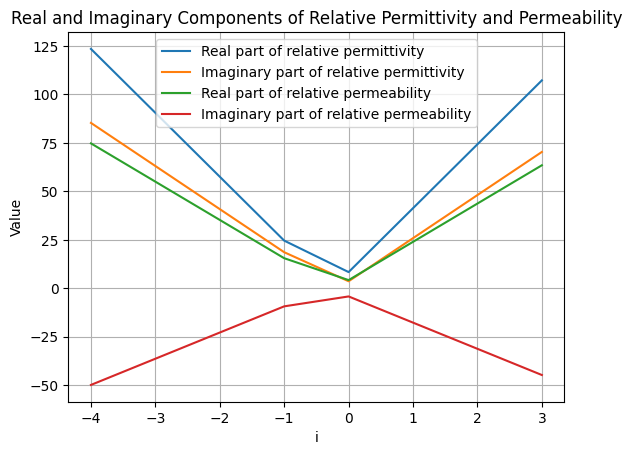

In [7]:
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(r'07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_AVG.s2p',True)
filename = r'07032023_Ferrite_Meas_Current\FERRITE_SAMPLE_25A_DEEMBED.s2p'
frequency, s11_mag, s11_phase, s21_mag, s21_phase = s2p.parameters(filename, True)

# Phase correction
lambda_0 = c / frequency
phi_0 = 360 * d/lambda_0
s11_phase = s11_phase
s21_phase = s21_phase - phi_0

# Calculate the reflection and transmission coefficients
s11 = s11_mag * np.exp(1j * np.deg2rad(s11_phase))
s21 = s21_mag * np.exp(1j * np.deg2rad(s21_phase))

# Plot the data with the air sample phase correction added
s2p.plot_parameters(filename + " with Phase Correction", frequency, s11_mag, s11_phase, s21_mag, s21_phase)

# Calculate the relative permittivity and permeability
K = (s11**2-s21**2+1)/(2*s11)

R = np.zeros_like(K)
mask = np.abs(K + np.sqrt(K**2 - 1)) > 1
R[mask] = K[mask] - np.sqrt(K[mask]**2 - 1)
R[~mask] = K[~mask] + np.sqrt(K[~mask]**2 - 1)

T = (s11+s21-R)/(1-(s11+s21)*R)
lambda_0 = c / frequency

# Plot different values of epsilon and mu due to different values of the complex logaritm
epsilon_r_values = []  # List to store relative permittivity values
mu_r_values = []  # List to store relative permeability values
i_values = range(-4, 4)

for i in i_values:
    
    A = -((1/(2*np.pi*d)) * np.log(1/T) + 2j*np.pi*i)**2

    # Non-zero cut off wavelength
    #mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2-1/lambda_c**2)
    #epsilon_r = (lambda_0**2 / mu_r ) * (1/lambda_c**2+ A)

    # Zero cut-off wavelength
    mu_r = np.sqrt(A) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2)
    epsilon_r = (lambda_0**2 / mu_r ) * (A)
    print("i: ", i)
    print('Relative permittivity: ', np.average(epsilon_r))
    print('Relative permeability: ', np.average(mu_r))

    epsilon_r_values.append(np.average(epsilon_r))
    mu_r_values.append(np.average(mu_r))

# Plot the values
plt.plot(i_values, np.real(epsilon_r_values), label='Real part of relative permittivity')
plt.plot(i_values, np.imag(epsilon_r_values), label='Imaginary part of relative permittivity')
plt.plot(i_values, np.real(mu_r_values), label='Real part of relative permeability')
plt.plot(i_values, np.imag(mu_r_values), label='Imaginary part of relative permeability')
plt.xlabel('i')
plt.ylabel('Value')
plt.title('Real and Imaginary Components of Relative Permittivity and Permeability')
plt.legend()
plt.grid(True)
plt.show()